## $\color{green}{\text{Ciencia de Datos:}}$ Visualización de la Información
UNAM-IIMAS, Semestre 2023-2
## $\color{blue}{\text{Práctica-04: Análisis de Componentes Principales, PCA}}$

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con $n$ individuos cada uno con $p$ variables ($X_{1}, X_{2}, …, X_{p}$), es decir, el espacio muestral tiene $p$ dimensiones. PCA permite encontrar un número de factores subyacentes ($z<p$) que explican aproximadamente lo mismo que las $p$ variables originales. Donde antes se necesitaban $p$ valores para caracterizar a cada individuo, ahora bastan $z$ valores. Cada una de estas $z$  nuevas variables recibe el nombre de **$\color{blue}{\text{componente principal}}$**.

**$\color{red}{\text{Objetivo}}$**: Reducir la dimensionalidad de un conjunto de datos y así *simplificar* el modelado posterior.

* Estandarizar los datos (para cada una de las $m$ observaciones)
* Obtener los **vectores** y **valores propios** a partir de la matriz de covarianzas o de correlaciones o incluso la técnica de Descomposición de Valores Singulares.
* Ordenar los valores propios en orden descendente y quedarnos con los $p$ que se correspondan a los $p$ mayores y así disminuir el número de variables del dataset ($p<m$)
* Constrir la matriz de proyección $W$ a partir de los $p$ vectores propios
* Transformar el dataset original $X$ a través de $W$ para así obtener datos en el subespacio dimensional de dimensión $p$, que será $Y$

## Dataset
El dataset de clasificación contiene las $\color{blue}{\text{medidas de flores}}$ (en centímetros) que pertenecen a 3 especies diferentes:
* Iris-setosa
* Iris-versicolor
* Iris-virginica

Contiene 4 atributos o características. En particular, la **$\color{red}{\text{longitud}}$** y la **$\color{red}{\text{anchura}}$** de sus pétalos y sépalos expresadas en centímetros. Por tanto, se trata de un problema de 4 dimensiones.

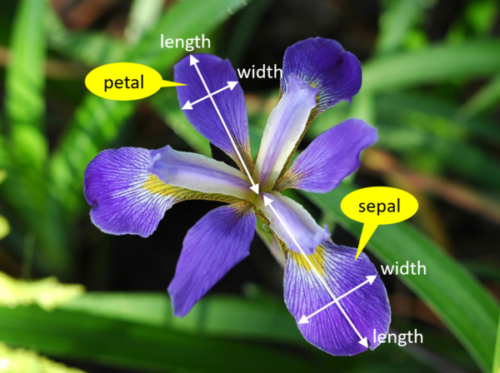

In [1]:
import numpy as np
import IPython.display as display
from PIL import Image
display.display(Image.open('iris_petal-sepal.png'))

In [2]:
# Carga de los datos y librerías
import pandas as pd

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### $\color{blue}{\text{Gráfico de dispersión}}$
El diagrama de dispersión es una buena manera de visualizar las correlaciones entre las características. Se examina la **correlación** de **$\color{red}{\text{Longitud del sépalo}}$** con otras características. Entonces, **$\color{red}{\text{Longitud del sépalo}}$** será nuestro eje $y$, otros se ubicarán en el eje $x$. Entonces se clasifican y se mantienen en marcos de datos distintos para ver las correlaciones claramente.

In [5]:
data_sorted_bySW = df.sort_values('Sepal.Width')
data_sorted_byPL = df.sort_values('Petal.Length')
data_sorted_byPW = df.sort_values('Petal.Width')

In [6]:
# !pip install plotly
# !pip install cufflinks

In [7]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

df2 = df.iloc[:100, :]

bySW = go.Scatter(
                    x = data_sorted_bySW['Sepal.Width'],
                    y = data_sorted_bySW['Sepal.Length'],
                    mode = "markers",
                    name = "Ancho del sépalo (cm)",
                    marker = dict(color = 'rgba(255, 0, 0, 0.9)'),
                    text = data_sorted_bySW.Species
)

byPL = go.Scatter(
                    x = data_sorted_byPL['Petal.Length'],
                    y = data_sorted_byPL['Sepal.Length'],
                    mode = "markers",
                    name = "Longitud del pétalo (cm)",
                    marker = dict(color = 'rgba(0, 255, 0, 0.9)'),
                    text = data_sorted_byPL.Species
)

byPW = go.Scatter(
                    x = data_sorted_byPW['Petal.Width'],
                    y = data_sorted_byPW['Sepal.Length'],
                    mode = "markers",
                    name = "Ancho del pétalo (cm)",
                    marker = dict(color = 'rgba(0, 0, 255, 0.9)'),
                    text = data_sorted_byPW.Species
)

layout = dict(title = 'Cambio de longitud del sépalo por otras propiedades',
              xaxis= dict(title= 'centimetros',ticklen= 5,zeroline= False)
             )
u = [bySW, byPL, byPW]
fig = dict(data = u, layout=layout)
iplot(fig)

* Parece que el **ancho del pétalo** y la **longitud del sépalo** tienen una correlación muy fuerte.
* Podemos decir que existe una correlación entre la **longitud del pétalo** y la **longitud del sépalo**, pero no como la anterior.
* No hay correlación entre la **longitud del sépalo** y el **ancho del sépalo**.

De manera que como existe una correlación lineal entre **ancho del pétalo** y **longitud del sépalo** una de las variables se podría excluir del proceso.

### $\color{blue}{\text{Gráfica de dispersión 3D}}$
Ahora se procede a analizar las tres variables restantes

In [8]:
i_setosa = df[df['Species']  == 'setosa']
i_versicolor = df[df['Species']  == 'versicolor']
i_virginica = df[df['Species']  == 'virginica']
i_setosa.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Iris-setosa
trace_setosa = go.Scatter3d(
                        x = i_setosa['Sepal.Length'],
                        y = i_setosa['Sepal.Width'],
                        z = i_setosa['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "setosa",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(255,102, 255,0.8)'
                        )
)

# Iris-versicolor
trace_versicolor = go.Scatter3d(
                        x = i_versicolor['Sepal.Length'],
                        y = i_versicolor['Sepal.Width'],
                        z = i_versicolor['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "versicolor",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(102, 255, 51, 0.8)'
                        )
)

# Iris-virginica
trace_virginica = go.Scatter3d(
                        x = i_virginica['Sepal.Length'],
                        y = i_virginica['Sepal.Width'],
                        z = i_virginica['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "virginica",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(51, 102, 255, 0.8)'
                        )
)

list_3d = [trace_setosa, trace_versicolor, trace_virginica]

fig_3d = go.Figure(data = list_3d)
iplot(fig_3d)

A continuación, dividimos el conjunto de datos en dos partes.

In [10]:
#matriz de datos y categoría
X = df.iloc[:,0:4].values
# la submatriz "x" contiene los valores de las primeras 4 columnas 
# del dataframe y todas las filas\n

y = df.iloc[:,4].values
# El vector "y" contiene los valores de la 4 columna (especie) para todas las filas

In [11]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [12]:
y[0]

'setosa'

In [13]:
import plotly.graph_objects as go
import plotly.tools as tls

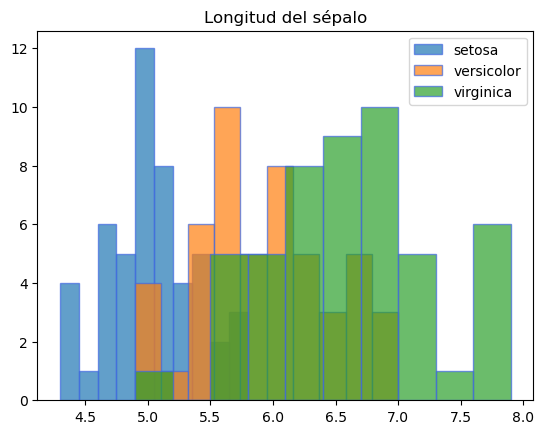

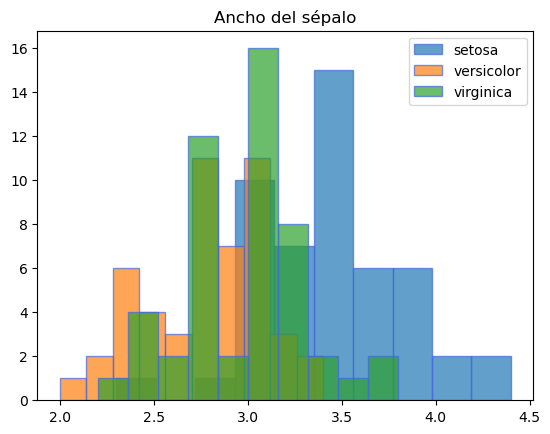

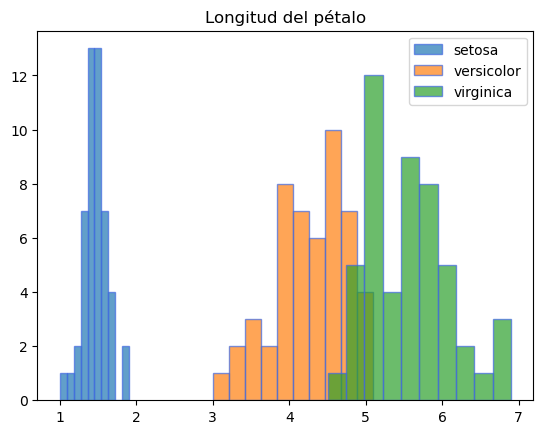

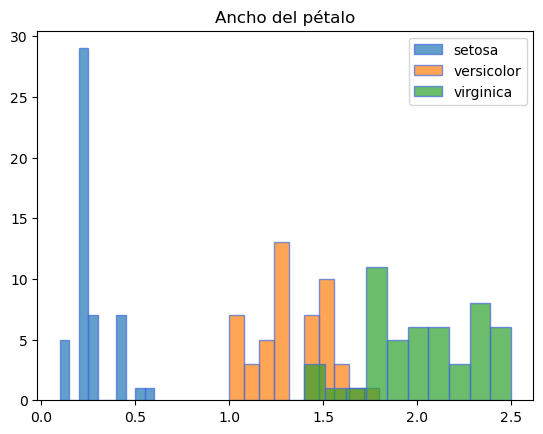

In [14]:
import matplotlib.pyplot as plt

i_setosa = df[df['Species']  == 'setosa']
i_versicolor = df[df['Species']  == 'versicolor']
i_virginica = df[df['Species']  == 'virginica']

plt.hist(i_setosa["Sepal.Length"], alpha=0.7, label='setosa',edgecolor='royalblue',stacked=True)
plt.hist(i_versicolor["Sepal.Length"], alpha=0.7, label='versicolor',edgecolor='royalblue',stacked=True)
plt.hist(i_virginica["Sepal.Length"], alpha=0.7, label='virginica',edgecolor='royalblue',stacked=True)
plt.legend(loc='upper right')
plt.title("Longitud del sépalo")
plt.show()


plt.hist(i_setosa["Sepal.Width"], alpha=0.7, label='setosa',edgecolor='royalblue')
plt.hist(i_versicolor["Sepal.Width"], alpha=0.7, label='versicolor',edgecolor='royalblue')
plt.hist(i_virginica["Sepal.Width"], alpha=0.7, label='virginica',edgecolor='royalblue')
plt.legend(loc='upper right')
plt.title("Ancho del sépalo")
plt.show()

plt.hist(i_setosa["Petal.Length"], alpha=0.7, label='setosa',edgecolor='royalblue',stacked=True)
plt.hist(i_versicolor["Petal.Length"], alpha=0.7, label='versicolor',edgecolor='royalblue')
plt.hist(i_virginica["Petal.Length"], alpha=0.7, label='virginica', edgecolor='royalblue')
plt.legend(loc='upper right')
plt.title("Longitud del pétalo")
plt.show()


plt.hist(i_setosa["Petal.Width"], alpha=0.7, label='setosa', edgecolor='royalblue')
plt.hist(i_versicolor["Petal.Width"], alpha=0.7, label='versicolor', edgecolor='royalblue')
plt.hist(i_virginica["Petal.Width"], alpha=0.7, label='virginica', edgecolor='royalblue')
plt.legend(loc='upper right')
plt.title("Ancho del pétalo")
plt.show()

# $\color{blue}{\text{Normalización}}$

Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de **normalizar sus valores**. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Al aplicar esta técnica se asume que los datos de trabajo tienen una distribución gaussiana o normal. Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. 

In [15]:
# Aplicamos una transformación de los datos para poder aplicar 
# las propiedades de la distribución normal\n
from sklearn.preprocessing import StandardScaler

In [16]:
# Estandariza las variables (i.e., por columna) a media cero y varianza unitaria
X_std = StandardScaler().fit_transform(X)

In [17]:
# Estandariza las variables y grafica histogramas como los anteriores
dfX_std = pd.DataFrame(X_std)
dfX_std.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### 1- Calculamos la descomposición de valores y vectores propios
Los **vectores propios** son las direcciones en las que la varianza de los datos es mayor. La varianza  de una variable aleatoria es una *medida de dispersión* (definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media). Por tanto, las direcciones en las que la varianza es mayor, representan la esencia principal de la información contenida en el dataset, por eso se les llama **Componentes Principales**. Al igual que un $\color{blue}{\text{vector propio}}$ es una $\color{blue}{\text{dirección}}$, el $\color{red}{\text{valor propio}}$ es un $\color{red}{\text{número}}$, que representa el valor de la varianza sobre ese vector propio. Por ello, para encontrar las Componentes Principales que concentren esa esencia de la información del dataset, calcularemos primero la matriz de covarianza, que nos da la medida de dispersión conjunta entre variables.

##### a) Usando la Matriz de Covarianzas

In [18]:
from IPython.display import display, Math, Latex

In [19]:
display(Math(r'\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^m (x_{ij} - \overline{x_j})(x_{ik} - \overline{x_k})'))

<IPython.core.display.Math object>

In [20]:
# Matriz de covarianzas
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

<IPython.core.display.Math object>

In [21]:
# Vector promedio (vector de promedios)
display(Math(r'\overline{x} = \sum_{i=1}^n x_i\in \mathbb R^m'))

<IPython.core.display.Math object>

In [22]:
import numpy as np

In [23]:
# Observar que la media es casi cero
mean_vect = np.mean(X_std, axis=0)
mean_vect

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [24]:
(X_std - mean_vect)[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [25]:
X_std[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [26]:
mean_vect

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [27]:
cov_matrix = (X_std - mean_vect).T.dot((X_std - mean_vect))/(X_std.shape[0]-1)
print("La matriz de covarianza es \n%s"%cov_matrix)

La matriz de covarianza es 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [28]:
np.cov(X_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [29]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


##### b) Usando la Matriz de Correlaciones

In [30]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [31]:
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [32]:
corr_matrix = np.corrcoef(X.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

##### c) Descomposición de Valores Singulares

In [33]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [34]:
s

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [35]:
v

array([[ 1.08239531e-01,  9.94577561e-02,  1.12996303e-01, ...,
        -7.27030413e-02, -6.56112167e-02, -4.59137323e-02],
       [-4.09957970e-02,  5.75731483e-02,  2.92000319e-02, ...,
        -2.29793601e-02, -8.63643414e-02,  2.07800179e-03],
       [ 2.72186462e-02,  5.00034005e-02, -9.42089147e-03, ...,
        -3.84023516e-02, -1.98939364e-01, -1.12588405e-01],
       ...,
       [ 5.43380310e-02,  5.12936114e-03,  2.75184277e-02, ...,
         9.89532683e-01, -1.41206665e-02, -8.30595907e-04],
       [ 1.96438400e-03,  8.48544595e-02,  1.78604309e-01, ...,
        -1.25488246e-02,  9.52049996e-01, -2.19201906e-02],
       [ 2.46978090e-03,  5.83496936e-03,  1.49419118e-01, ...,
        -7.17729676e-04, -2.32048811e-02,  9.77300244e-01]])

### 2 - Las componentes principales

In [36]:
# verifique que los vectores propios son unitarios (que forman una base al menos normal, 
# se podría pedir averiguar si es ortonormal)
for ev in eig_vectors:
    print("La longitud del VP es: %s"%np.linalg.norm(ev))

La longitud del VP es: 0.9999999999999998
La longitud del VP es: 1.0
La longitud del VP es: 1.0000000000000002
La longitud del VP es: 1.0


In [37]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.938085050199993,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624864,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494804,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.0208538621764621,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Ordenamos los **vectores propios** con valor propio de *mayor* a *menor*:

In [38]:
eigen_pairs.sort()
eigen_pairs.reverse()
eigen_pairs

[(2.938085050199993,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624864,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494804,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.0208538621764621,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Si lo que queremos es **reducir la dimensionalidad** del dataset, perdiendo la menor información posible, descartaremos los *vectores propios* cuyos valores propios sean más bajos, ya que son aquellos que menos información aportan al conjunto global.

In [39]:
print("Valores propios en orden descendente:")
for ep in eigen_pairs:
    print(ep[0])

Valores propios en orden descendente:
2.938085050199993
0.9201649041624864
0.14774182104494804
0.0208538621764621


In [40]:
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

El objetivo de este caso es proyectar este dataset 4D en un espacio de **menor dimensionalidad**, para mejorar la eficiencia de cálculo, al mismo tiempo que se retiene la mayor parte de la información. La pregunta clave será $\color{red}{\text{¿cuál va ser este valor?}}$ ¿3D?,   ¿2D?, ¿1D?. Para ello seguiremos el siguiente proceso.

Una vez ordenados los valores propios, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de vectores propios o componentes principales, con el que podemos expresar “**la esencia principal**” de la información contenida en ese dataset. Para ello, usaremos un métrica que se conoce como 
$\color{blue}{\text{“varianza explicada”}}$, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

In [41]:
plot1 = go.Bar(x=["CP %s"%i for i in range(1,5)], y = var_exp, showlegend=False)
plot2 = go.Scatter(x=["CP %s"%i for i in range(1,5)], y = cum_var_exp, showlegend=True, name = "% de Varianza Explicada Acumulada")

data = go.Data([plot1, plot2])

layout = go.Layout(xaxis = go.XAxis(title="Componentes principales"), 
               yaxis = go.YAxis(title = "Porcentaje de varianza explicada"),
               title = "Porcentaje de variabilidad explicada por cada componente principal")

fig = go.Figure(data = data, layout = layout)
fig.show()

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:572: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




En la gráfica se aprecia claramente que la *mayor parte de la varianza* (en torno al 72%) corresponde a la **primera componente**. La segunda acumula algo más del 22% de la varianza, mientras que la tercera (3%) puede ser descartada sin perder demasiada información, ya que las dos primeras componentes explican más del 94% de la varianza.

En este ejemplo, construiremos una matriz de proyección que convertirá el conjunto de datos inicial (de 4D) en un conjunto de datos de 2D centrado en las sus *componentes principales* (las direcciones de los vectores propios correspondientes). De esta forma, la tarea de interpretar los patrones de información contenidos en los datos, será mucho más sencilla.

In [42]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), 
               eigen_pairs[1][1].reshape(4,1)))
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [43]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

### 3- Proyectando las variables en el nuevo subespacio vectorial

In [44]:
display(Math(r'Y = X \cdot W, X \in M(\mathbb R)_{150, 4}, W \in M(\mathbb R)_{4,2}, Y \in M(\mathbb R)_{150, 2}'))

<IPython.core.display.Math object>

In [45]:
Y = X_std.dot(W)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

Y, por último, representamos gráficamente el nuevo espacio de datos, con éstas últimas líneas:

In [46]:
results = []
for name in ('setosa', 'versicolor', 'virginica'):
    result = go.Scatter(x=Y[y==name,0], y = Y[y==name, 1], 
                        mode = "markers", name=name, 
                        marker=go.Marker(size = 12, line = go.Line(color='rgba(220,220,220,0.15)', width=0.5), opacity = 0.8))
    results.append(result)

data = go.Data(results)
layout = go.Layout(showlegend=True, scene =go.Scene(xaxis=go.XAxis(title="Componente Principal 1"),
                                                    yaxis=go.YAxis(title="Componente Principal 2")))

fig = go.Figure(data=data, layout=layout)
fig.show()

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




Por lo tanto, se ha conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos dimensiones que aún así conserva la **información más esencial**, de forma que nos resultará mucho más sencillo el trabajo de crear, por ejemplo, un modelo de clasificación a partir de estos datos.

# EJERCICIOS

$\color{red}{\text{(1)}}$ Trace un gráfico de barras que muestre el número de datos disponibles para cada especie en el conjunto de datos. Ponga un color diferente para cada especie.

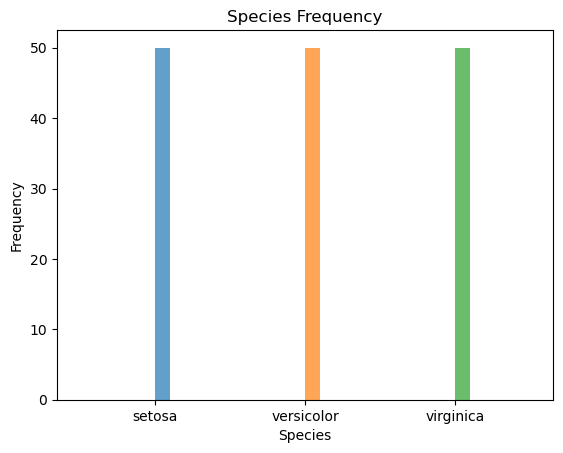

In [47]:
column1 = df[df['Species'] == 'setosa']['Species']
column2 = df[df['Species'] == 'versicolor']['Species']
column3 = df[df['Species'] == 'virginica']['Species']

plt.hist(column1, alpha = 0.7)
plt.hist(column2, alpha = 0.7)
plt.hist(column3, alpha = 0.7)

plt.xlabel('Species')
plt.ylabel('Frequency')

plt.title("Species Frequency")
plt.show()

$\color{red}{\text{(2)}}$ Elabore un diagrama de caja (Box plot) del conjunto de datos, que nos muestre la representación visual de cómo se dispersan nuestros datos en el plano. Este método se utiliza en el análisis estadístico para comprender varias medidas, como la media, la mediana y la desviación.

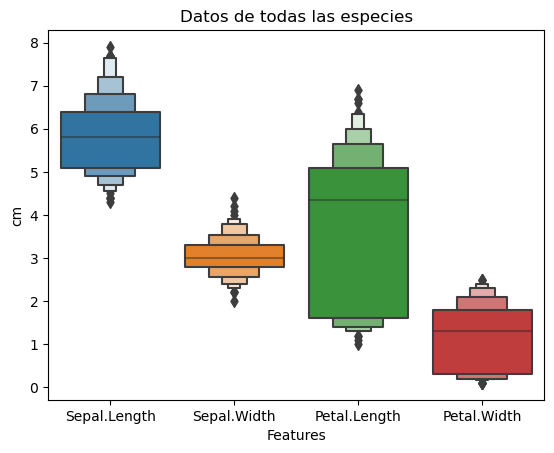

In [48]:
import seaborn as sns

# Creamos el boxplot
sns.boxenplot(data=df)

plt.xlabel('Features')
plt.ylabel('cm')
plt.title('Datos de todas las especies')

plt.show()


$\color{red}{\text{(3)}}$ Muestre una gráfica que permita analizar la longitud del sépalo para cada especie. Esto es, analice cada atributo por separado para cada especie. Use un color diferente para cada especie.

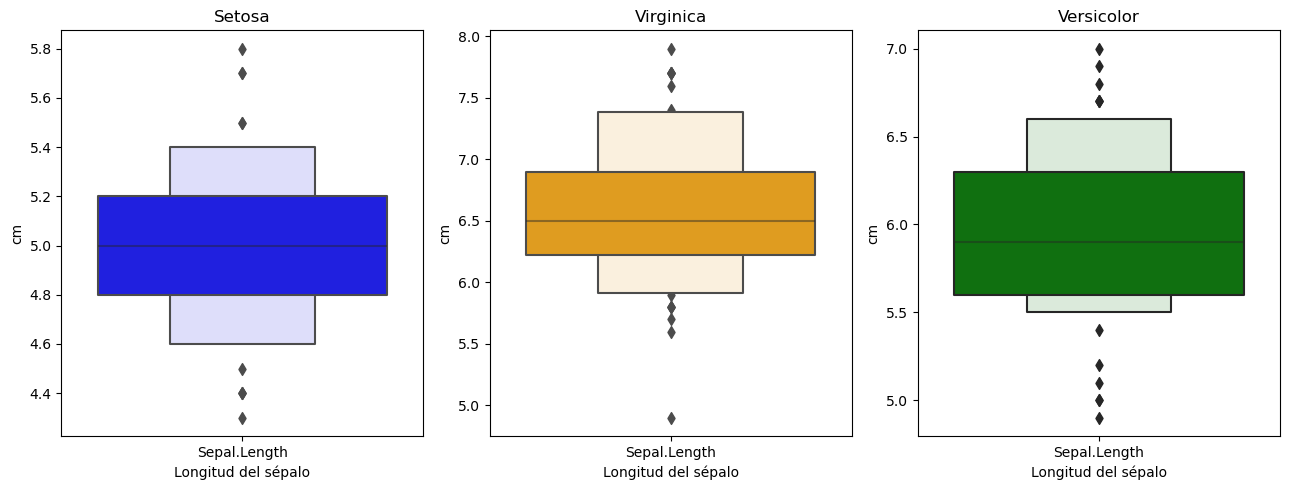

In [49]:
import seaborn as sns

# Creamos el boxplot
sepalo_versicolor = df[df['Species'] == 'versicolor'].loc[:,['Sepal.Length']]
sepalo_virginica = df[df['Species'] == 'virginica'].loc[:,['Sepal.Length']]
sepalo_setosa =  df[df['Species'] == 'setosa'].loc[:,['Sepal.Length']]


# Creamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 5))

# Creamos el boxplot
sns.boxenplot(data=sepalo_setosa, ax=ax1, color='blue')
ax1.set_xlabel('Longitud del sépalo')
ax1.set_ylabel('cm')
ax1.set_title('Setosa')

sns.boxenplot(data=sepalo_virginica, ax=ax2, color='orange')
ax2.set_xlabel('Longitud del sépalo')
ax2.set_ylabel('cm')
ax2.set_title('Virginica')

sns.boxenplot(data=sepalo_versicolor, ax=ax3, color='green')
ax3.set_xlabel('Longitud del sépalo')
ax3.set_ylabel('cm')
ax3.set_title('Versicolor')

fig.tight_layout()
plt.show()

$\color{red}{\text{(4)}}$ Trace una gráfica que indique el promedio de todas las longitudes de sépalos de especies de Iris. Use un color diferente para cada especie.

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



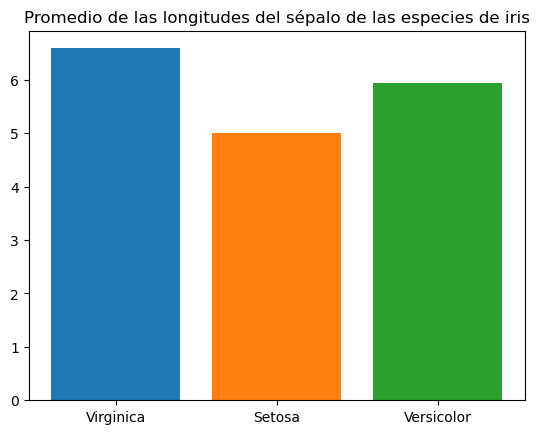

In [50]:
m_setosa = np.mean(sepalo_setosa)
m_versicolor = np.mean(sepalo_versicolor)
m_virginica = np.mean(sepalo_virginica)

plt.bar(['Virginica'],m_virginica)
plt.bar(['Setosa'],m_setosa)
plt.bar(['Versicolor'],m_versicolor)


plt.title('Promedio de las longitudes del sépalo de las especies de iris')
plt.show()

$\color{red}{\text{(5)}}$ Elabore una gráfica que nos permita identificar cada especie con sus atributos. Esto es, una gráfica que me permita clasificar si una especie en particular es Iris-setosa, Iris-versicolor o Iris-virginica.  

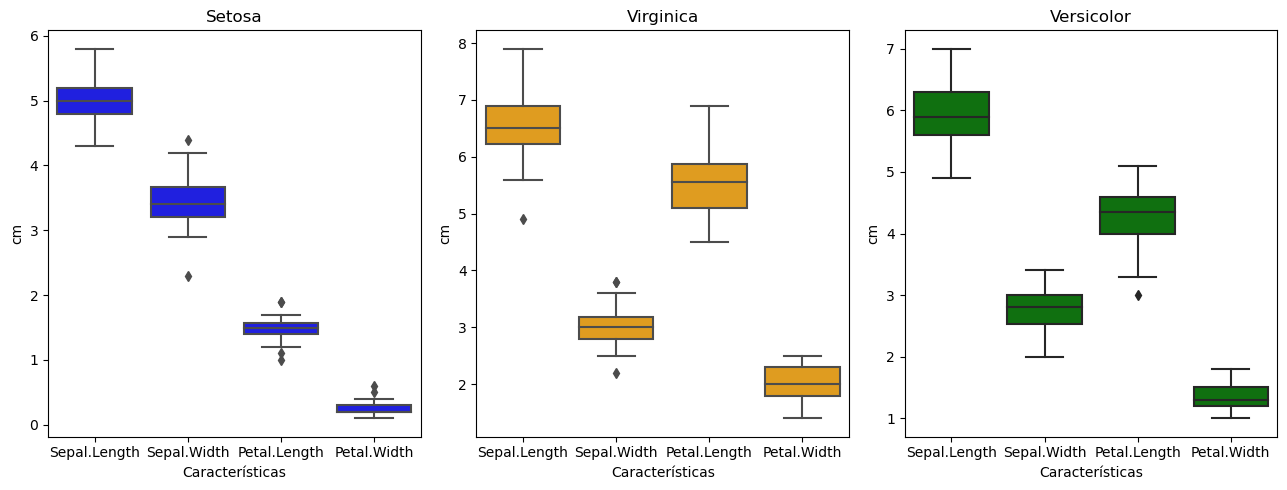

In [51]:
import seaborn as sns

df_setosa = df[df['Species'] == 'setosa']
df_virginica = df[df['Species'] == 'virginica']
df_versicolor = df[df['Species'] == 'versicolor']

# Creamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 5))

# Creamos el boxplot
sns.boxplot(data=df_setosa, ax=ax1, color='blue')
ax1.set_xlabel('Características')
ax1.set_ylabel('cm')
ax1.set_title('Setosa')

sns.boxplot(data=df_virginica, ax=ax2, color='orange')
ax2.set_xlabel('Características')
ax2.set_ylabel('cm')
ax2.set_title('Virginica')

sns.boxplot(data=df_versicolor, ax=ax3, color='green')
ax3.set_xlabel('Características')
ax3.set_ylabel('cm')
ax3.set_title('Versicolor')

fig.tight_layout()
plt.show()

## $\color{blue}{\text{(t-SNE) Incrustación de vecinos estocásticos distribuidos en t}}$

Es una técnica popular de **reducción de dimensionalidad**. A menudo tenemos datos donde las muestras se caracterizan por $n$ características. Para reducir la dimensionalidad, t-SNE genera un número menor de características (típicamente dos) que preserva la relación entre las muestras lo mejor posible.

Comenzaremos realizando t-SNE en una parte del conjunto de datos MNIST. 
* El conjunto de datos MNIST consiste en imágenes de dígitos dibujados a mano de 0 a 9.  
* Clasificar con precisión cada dígito es un desafío de aprendizaje automático. 

Text(0.5, 1.0, 'Etiqueta 8')

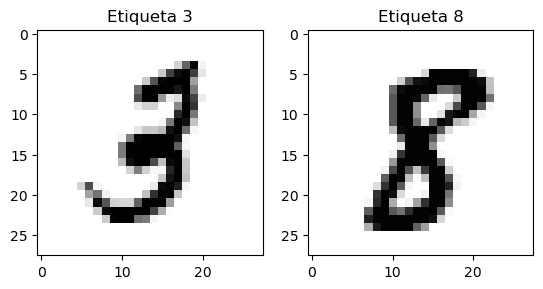

In [52]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
 
# Cargar el conjunto de datos MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
 
# Selección aleatoria de 1000 muestras por motivos de rendimiento.
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], 1000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]
 
# Mostrar dos ejemplos de muestras
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')
ax[0].set_title("Etiqueta 3")
ax[1].set_title("Etiqueta 8")

De forma predeterminada, los datos de MNIST que recuperamos vienen con 70,000 imágenes. 
* Seleccionamos 1,000 de ellos al azar. 
* Cada imagen consta de 784 píxeles y vienen como una matriz plana unidimensional. 
* Para mostrarlos como una imagen, los remodelamos en una matriz de 28$×$28. 
* Las imágenes están en X y sus etiquetas en y.

In [53]:
X.shape
# (1000, 784)
# 1000 muestras con 784 características.

y.shape
# (1000,)
# 1000 etiquetas

np.unique(y)
# arreglo(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)
# Las 10 clases de imagenes:

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Para usar t-SNE en estos datos se puede utilizar **scikit-learn**. Simplemente importamos la clase TSNE, le pasamos nuestros datos.

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



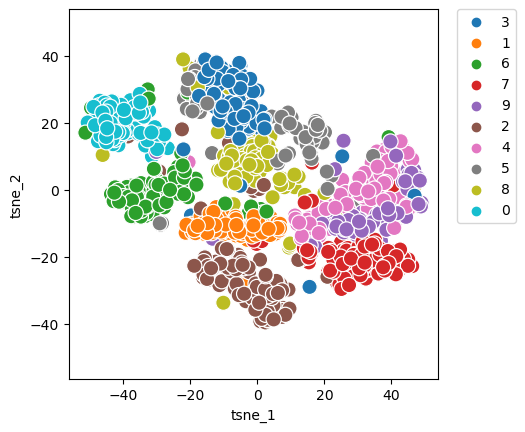

In [54]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# Queremos que TSNE se incruste con 2 dimensiones.
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Dos dimensiones para cada una de nuestras imágenes.
 
# Se grafica el resultado de nuestro TSNE con el código de color de la etiqueta.
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Hay que tomar en cuenta que no especificamos ningún parámetro excepto **n_components**. 

# $\color{blue}{\text{t-SNE paso a paso}}$
## La matriz de distancia
El primer paso de t-SNE es calcular **la matriz de distancia**. En nuestra incrustación t-SNE anterior, cada muestra se describe con dos características. En los datos reales, cada punto se describe por 728 características (los píxeles). 
* Trazar datos con tantas características es imposible y ese es el punto de la **reducción de la dimensionalidad**. 
* Sin embargo, incluso con 728 características, cada punto está a cierta distancia de cada otro punto. 
* Aquí vamos a utilizar la $\color{red}{\text{distancia euclidiana}}$.


$$\textbf{d(p,q)}^{2}=(q_1 -p_1)^{2}+(q_2 -p_2)^{2}$$

La definición de distancia euclidiana para dos características se extiende a $n$ características $(p_1, p_2, p_3,..., p_n)$. 
Una vez más, podemos usar **scikit-learn** para calcular la matriz de distancia euclidiana. También la calculamos después de clasificar las muestras por etiqueta.

Text(0.5, 1.0, 'Clasificado por etiqueta')

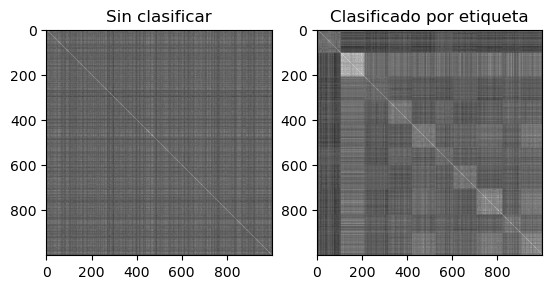

In [55]:
from sklearn.metrics import pairwise_distances
y_sorted_idc = y.argsort()
X_sorted = X[y_sorted_idc]
 
distance_matrix = pairwise_distances(X,
                                     metric='euclidean')
 
distance_matrix_sorted = pairwise_distances(X_sorted,
                                            metric='euclidean')
 
fig, ax = plt.subplots(1,2)
ax[0].imshow(distance_matrix, 'Greys')
ax[1].imshow(distance_matrix_sorted, 'Greys')
ax[0].set_title("Sin clasificar")
ax[1].set_title("Clasificado por etiqueta")

Cuando las muestras se ordenan por *etiqueta*, los patrones cuadrados surgen en la matriz de distancia. Blanco significa distancias euclidianas más pequeñas. 
* t-SNE intenta preservar aproximadamente las distancias entre las muestras, funciona en las **probabilidades conjuntas**, lo que nos lleva a nuestro segundo paso.

### Probabilidades conjuntas
La matriz de distancia nos indica qué tan separadas están las muestras. Las **probabilidades conjuntas** nos dicen lo probable que es que las muestras se elijan entre sí como "vecinos". Los dos están, por supuesto, relacionados, porque las muestras cercanas deberían tener más posibilidades de ser vecinas que las muestras más separadas. La distribución t se define por 
* la media, 
* los grados de libertad y 
* la escala ($\sigma$) 

Para nuestros propósitos de t-SNE, establecemos la media en 0 (en 0, las muestras están exactamente en el mismo lugar). Los grados de libertad se establecen en el número de componentes menos uno. Ese es uno en nuestro caso, ya que queremos dos componentes. El último parámetro libre es sigma y es importante porque determina qué tan anchas son las colas de la distribución.


Aquí es donde entra en juego el **parámetro de perplejidad**. El usuario elige un valor de perplejidad (los valores recomendados están entre 5 y 50) y, en función de la perplejidad, t-SNE elige sigmas que satisfacen esa perplejidad. 

* Para entender lo que esto significa, considere la primera fila de nuestra matriz de distancia. Nos dice la distancia de nuestro primer punto el uno al otro punto y a medida que transformamos esa fila con la distribución t obtenemos nuestra propia distribución $P$. 
* La **perplejidad** se define como $2H^{P}$ donde $H$ es la *entropía de Shannon*. Los diferentes valores para sigma darán como resultado diferentes distribuciones, que difieren en entropía y, por lo tanto, difieren en perplejidad.

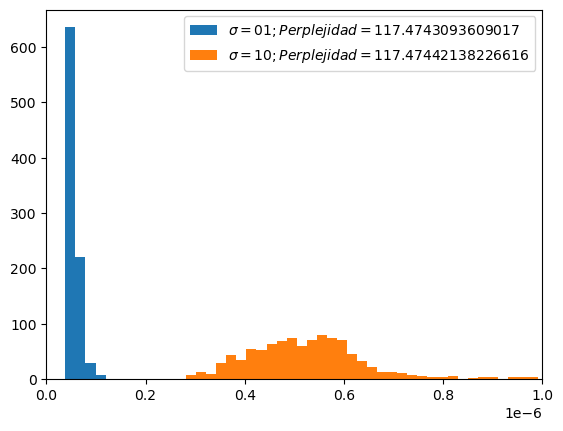

In [56]:
from scipy.stats import t, entropy
 
x = distance_matrix[0,1:]
t_dist_sigma01 = t(df=1.0, loc=0.0, scale=1.0)
t_dist_sigma10 = t(df=1.0, loc=0.0, scale=10.0)
P_01 = t_dist_sigma01.pdf(x)
P_10 = t_dist_sigma10.pdf(x)
 
perplexity_01 = 2**entropy(P_01)
perplexity_10 = 2**entropy(P_10)
 
dist_min = min(P_01.min(), P_10.min())
dist_max = max(P_01.max(), P_10.max())
bin_size = (dist_max - dist_min) / 100
bins = np.arange(dist_min+bin_size/2, dist_max+bin_size/2, bin_size)
fig, ax = plt.subplots(1)
ax.hist(P_01, bins=bins)
ax.hist(P_10, bins=bins)
ax.set_xlim((0, 1e-6))
ax.legend((r'$\sigma = 01; Perplejidad = $' + str(perplexity_01),
           r'$\sigma = 10; Perplejidad = $' + str(perplexity_10)))

Arriba podemos ver lo que sucede con la distribución conjunta de probabilidad a medida que aumentamos el *sigma*. Con el aumento del sigma, la entropía aumenta y también la perplejidad. 
* t-SNE realiza una búsqueda binaria del sigma que produce la perplejidad especificada por el usuario. 
* Esto significa que el **perplejidad** controla la posibilidad de que los puntos lejanos sean elegidos como vecinos. 
* Por lo tanto, la perplejidad se interpreta comúnmente como una $\color{red}{\text{medida del número de muestras vecinas}}$. 

El valor predeterminado para la perplejidad es 30 en la implementación **sklearn** de t-SNE. Para calcular las probabilidades conjuntas tenemos que

In [57]:
from sklearn.manifold import _t_sne
 
perplexity = 30  # Lo mismo que la perplejidad predeterminada.
p = _t_sne._joint_probabilities(distances=distance_matrix,
                                desired_perplexity = perplexity,
                                verbose=False)

Nuestras probabilidades conjuntas ya no son una matriz. La matriz de distancia es simétrica a lo largo de una de sus diagonales y la diagonal es todo ceros. Así que solo mantenemos el triángulo superior de la matriz en una matriz plana $p$. Eso es todo lo que necesitamos para pasar de las **probabilidades conjuntas** al siguiente paso.

### Optimizar la incrustación con descenso de gradiente
Ahora que tenemos las probabilidades conjuntas de nuestros datos de alta dimensión, queremos generar una incrustación de baja dimensión con solo dos características que conserve las probabilidades conjuntas lo mejor posible. 
* Primero necesitamos inicializar nuestra incrustación de baja dimensión. Por defecto, sklearn usará una inicialización aleatoria, así que eso es lo que usaremos. 
* Una vez que inicializamos nuestra incrustación, la optimizaremos utilizando el descenso de gradiente. Esta optimización es el núcleo de t-SNE y lo haremos después. 
* Para lograr una buena incrustación, t-SNE optimiza la divergencia de Kullback-Leibler entre las probabilidades conjuntas de los datos y su incrustación. Es una medida de la similitud de dos distribuciones. 

La clase sklearn TSNE viene con su propia implementación de la divergencia Kullback-Leibler y todo lo que tenemos que hacer es pasarla a la función **_gradient_descent** con la incrustación inicial y las probabilidades conjuntas de los datos.

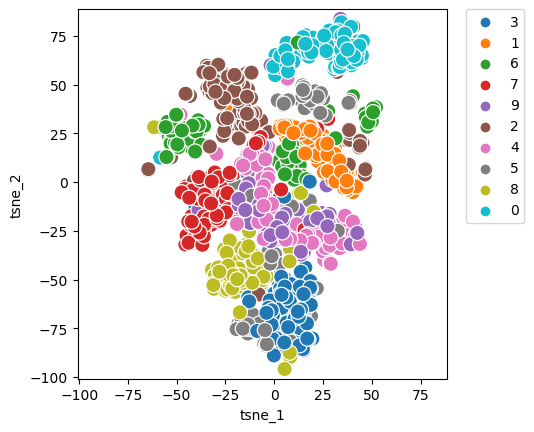

In [58]:
# Crear la incrustación inicial.
n_samples = X.shape[0]
n_components = 2
X_embedded = 1e-4 * np.random.randn(n_samples,
                                    n_components).astype(np.float32)

# Aplanar la matriz bidimensional a 1D.
embedding_init = X_embedded.ravel()  
 
# kl_kwargs define los argumentos que se transmiten a _kl_divergence.
kl_kwargs = {'P': p,
             'degrees_of_freedom': 1,
             'n_samples': 1000,
             'n_components':2}
 
# Realizar descenso de gradiente
embedding_done = _t_sne._gradient_descent(_t_sne._kl_divergence,
                                          embedding_init,
                                          0,
                                          1000,
                                          kwargs=kl_kwargs)
 
# Obtener los componentes TSNE primero y segundo en una matriz 2D.
tsne_result = embedding_done[0].reshape(1000,2)
 
# Convertir a DataFrame y trazar
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0],
                               'tsne_2': tsne_result[:,1],
                               'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)